# ADS 502 Final Project
# 
## Heart Failure Detection
# 
### Team 4

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tools.tools as stattools
import statsmodels.stats.outliers_influence as inf


from scipy import stats
from sklearn import tree
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [62]:
url = 'https://raw.githubusercontent.com/dingyiduan7/ADS-502/main/ADS%20502%20Final_Project/heart_failure_clinical_records_dataset.csv'
heart = pd.read_csv(url)
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploratory Data Analysis (EDA)

Get a summary of the dataframe

In [63]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


First, check for missing data

In [64]:
heart.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Use skewness of histogram and boxplot to check for outliers for continuous variables:

#### age;
#### creatinine_phosphokinase;
#### ejection_fraction;
#### platelets;
#### serum_creatinine;
#### serum_sodium.

Text(0.5, 1.0, 'Frequency of age')

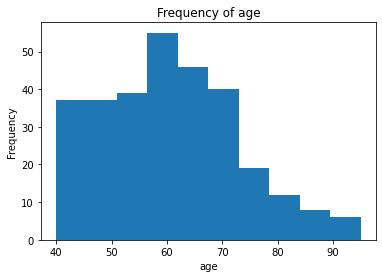

In [177]:
heart['age'].plot.hist()
plt.xlabel('age')
plt.title('Frequency of age')

Text(0.5, 1.0, 'Boxplot of age')

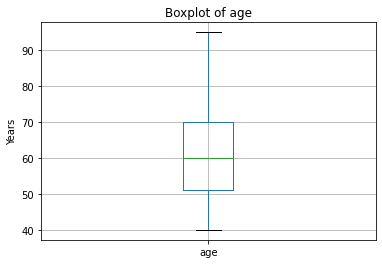

In [212]:
fig = plt.figure()
boxplot = heart.boxplot(column=['age'])
plt.ylabel('Years')
plt.title('Boxplot of age')

Text(0.5, 1.0, 'Frequency of creatinine phosphokinase')

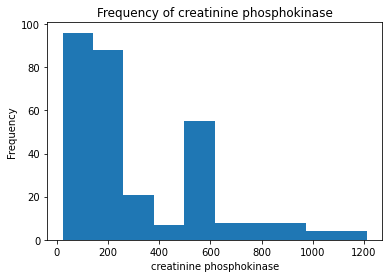

In [178]:
heart['creatinine_phosphokinase'].plot.hist()
plt.xlabel('creatinine_phosphokinase')
plt.title('Frequency of creatinine phosphokinase')

Text(0.5, 1.0, 'Boxplot of CPK enzyme in blood')

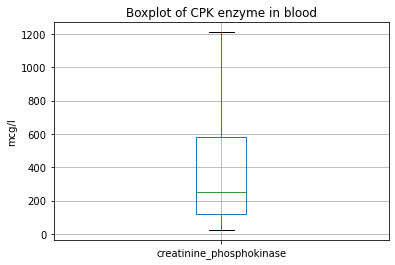

In [211]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])
plt.ylabel('mcg/l')
plt.title('Boxplot of CPK enzyme in blood')

Text(0.5, 1.0, 'Frequency of ejection fraction')

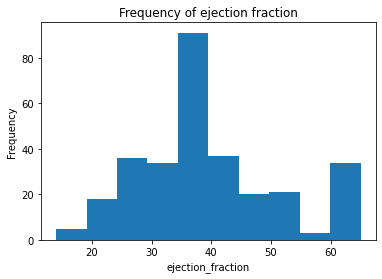

In [180]:
heart['ejection_fraction'].plot.hist()
plt.xlabel('ejection_fraction')
plt.title('Frequency of ejection fraction')

Text(0.5, 1.0, 'Boxplot of blood leaving the heart by ejection fraction ')

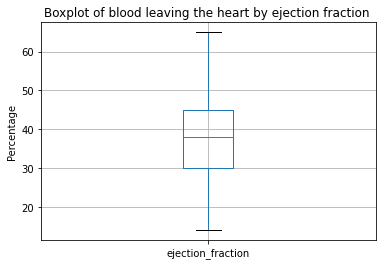

In [210]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])
plt.ylabel("Percentage")
plt.title('Boxplot of blood leaving the heart by ejection fraction ')

Text(0.5, 1.0, 'Frequency of platelets ')

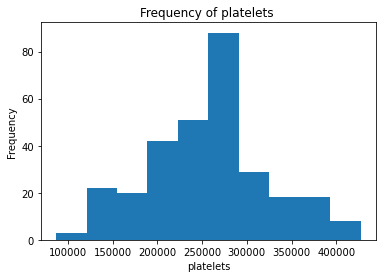

In [181]:
heart['platelets'].plot.hist()
plt.xlabel("platelets")
plt.title('Frequency of platelets ')

Text(0, 0.5, 'kiloplatelets/mL')

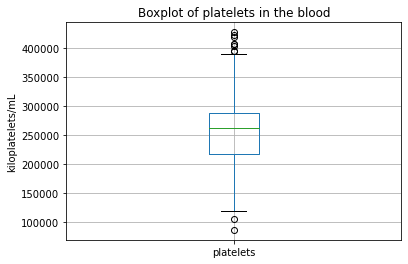

In [209]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])
plt.title('Boxplot of platelets in the blood')
plt.ylabel("kiloplatelets/mL")

Text(0.5, 1.0, 'Frequency of serum creatinine')

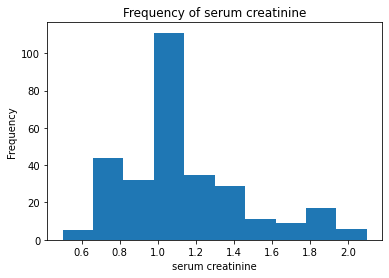

In [196]:
heart['serum_creatinine'].plot.hist()
plt.xlabel("serum creatinine")
plt.title('Frequency of serum creatinine')

Text(0.5, 1.0, 'Boxplot of serum creatinine in the blood ')

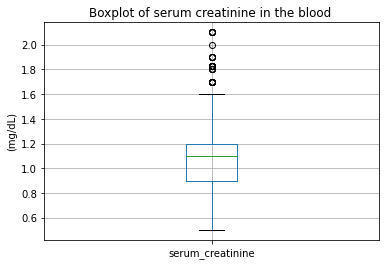

In [208]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])
plt.ylabel("(mg/dL)")
plt.title('Boxplot of serum creatinine in the blood ')

Text(0.5, 1.0, 'Frequency of serum sodium')

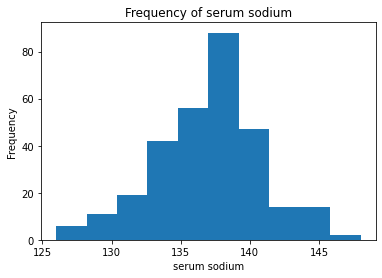

In [190]:
heart['serum_sodium'].plot.hist()
plt.xlabel("serum sodium")
plt.title('Frequency of serum sodium')

Text(0.5, 1.0, 'Boxplot of serum sodium in the blood')

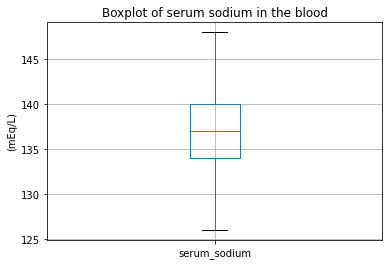

In [206]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])
plt.ylabel("(mEq/L)")
plt.title('Boxplot of serum sodium in the blood')

Based on the skewness and boxplot, we've decided to replace the outliers with median value in for these variables:
#### creatinine_phosphokinase
#### ejection_fraction
#### platelets
#### serum_creatinine
#### serum_sodium

Make a subset of above variables

In [77]:
heart_var = heart[["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"]]

In [78]:
heart.drop(["creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium"], axis=1, inplace=True)
heart.head()

,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,75.0,0,0,1,1,0,4,1
1,55.0,0,0,0,1,0,6,1
2,65.0,0,0,0,1,1,7,1
3,50.0,1,0,0,1,0,7,1
4,65.0,1,1,0,0,0,8,1


In [79]:
heart_var.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,582,20,265000.00,1.9,130
1,7861,38,263358.03,1.1,136
2,146,20,162000.00,1.3,129
3,111,20,210000.00,1.9,137
4,160,20,327000.00,2.7,116


Replace outliers with median values

In [80]:
for col in heart_var:   
    
    q3 = np.percentile(heart_var[col], 75)
    q1 = np.percentile(heart_var[col], 25)
    iqr = q3 - q1
    
    lower = q1 -(1.5 * iqr) 
    upper = q3 +(1.5 * iqr)
    
    med = heart_var[col].median()

    heart_var[col] = np.where((heart_var[col] >= upper), med ,heart_var[col]) 
    
    heart_var[col] = np.where((heart_var[col] <= lower), med ,heart_var[col])

In [81]:
heart = pd.concat([heart_var, heart], axis=1, join='inner')

In [82]:
heart.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT
0,582.0,20.0,265000.00,1.9,130.0,75.0,0,0,1,1,0,4,1
1,250.0,38.0,263358.03,1.1,136.0,55.0,0,0,0,1,0,6,1
2,146.0,20.0,162000.00,1.3,129.0,65.0,0,0,0,1,1,7,1
3,111.0,20.0,210000.00,1.9,137.0,50.0,1,0,0,1,0,7,1
4,160.0,20.0,327000.00,1.1,137.0,65.0,1,1,0,0,0,8,1


Check for outliers again

Text(0.5, 1.0, 'Boxplot of the creatinine phosphokinase enzyme in the blood ')

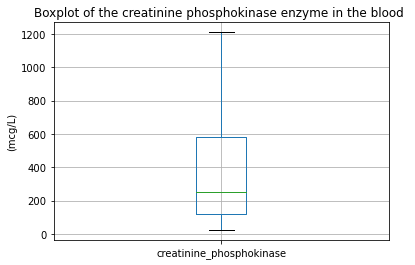

In [202]:
fig = plt.figure()
boxplot = heart.boxplot(column=['creatinine_phosphokinase'])
plt.ylabel("(mcg/L)")
plt.title('Boxplot of the creatinine phosphokinase enzyme in the blood ')

Text(0.5, 1.0, 'Boxplot of blood from ejection fraction leaving heart per contraction ')

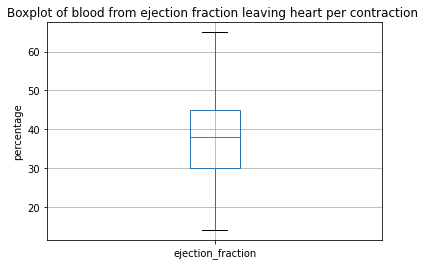

In [214]:
fig = plt.figure()
boxplot = heart.boxplot(column=['ejection_fraction'])
plt.ylabel("percentage")
plt.title('Boxplot of blood from ejection fraction leaving heart per contraction ')

Text(0.5, 1.0, 'Boxplot of  platelets in the blood')

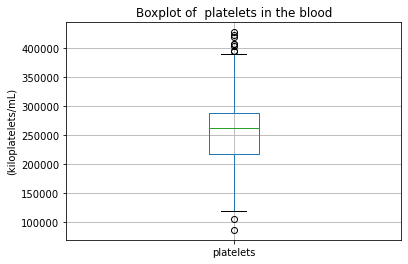

In [204]:
fig = plt.figure()
boxplot = heart.boxplot(column=['platelets'])
plt.ylabel("(kiloplatelets/mL)")
plt.title('Boxplot of  platelets in the blood')

Text(0.5, 1.0, 'Boxplot of serum creatinine in the blood')

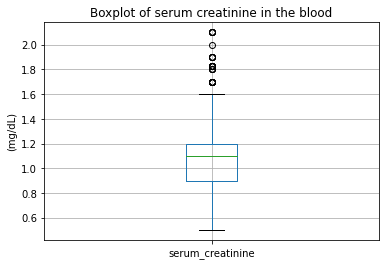

In [200]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_creatinine'])
plt.ylabel("(mg/dL)")
plt.title('Boxplot of serum creatinine in the blood')

Text(0.5, 1.0, 'Boxplot of serum sodium in the blood')

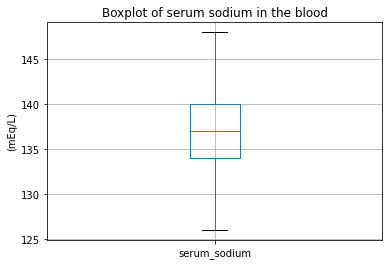

In [213]:
fig = plt.figure()
boxplot = heart.boxplot(column=['serum_sodium'])
plt.ylabel("(mEq/L)")
plt.title('Boxplot of serum sodium in the blood')

Use barchart to look at the relationships between categorical features and DEATH_EVENT. Categorical features include:
#### anaemia
#### diabetes
#### high_blood_pressure
#### sex
#### smoking

#### Normally, for categorical data, the values should be strings instead of '0' and '1'. If then we would perform add dummy variables so the attributes can be used for model building. But the dataset comes in binary format, so we skip that step.

Raw barcharts vs Normalized barcharts

Text(0.5, 1.0, 'Death Events betwen patients with and without anaemia ')

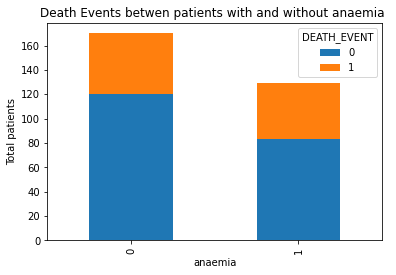

In [225]:
crosstab_anaemia = pd.crosstab(heart['anaemia'], heart['DEATH_EVENT'])
crosstab_anaemia.plot(kind='bar', stacked = True)
plt.ylabel("Total patients")
plt.title('Death Events betwen patients with and without anaemia ')

Text(0.5, 1.0, 'Normalized Death Events betwen patients with and without anaemia ')

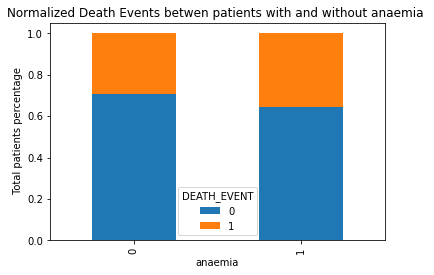

In [230]:
crosstab_norm_anaemia = crosstab_anaemia.div(crosstab_anaemia.sum(axis=1), axis = 0)

crosstab_norm_anaemia.plot(kind='bar', stacked = True)
plt.ylabel(" Total patients percentage")
plt.title('Normalized Death Events betwen patients with and without anaemia ')

In [90]:
heart.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

Text(0.5, 1.0, 'Death Events betwen patients with and without diabetes ')

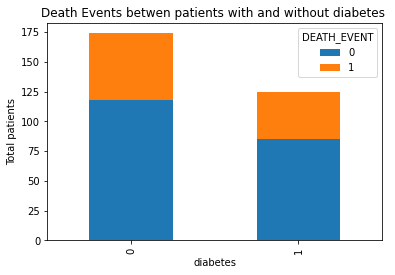

In [224]:
crosstab_diabetes = pd.crosstab(heart['diabetes'], heart['DEATH_EVENT'])
crosstab_diabetes.plot(kind='bar', stacked = True)
plt.ylabel("Total patients")
plt.title('Death Events betwen patients with and without diabetes ')

Text(0.5, 1.0, 'Normalized  Death Events betwen patients with and without diabetes ')

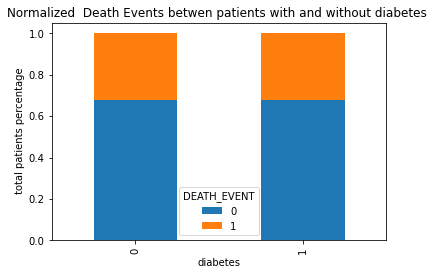

In [231]:
crosstab_norm_diabetes = crosstab_diabetes.div(crosstab_diabetes.sum(axis=1), axis = 0)
crosstab_norm_diabetes.plot(kind='bar', stacked = True)
plt.ylabel(" total patients percentage")
plt.title('Normalized  Death Events betwen patients with and without diabetes ')

In [93]:
heart.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Death Events betwen patients with and without high blood pressure ')

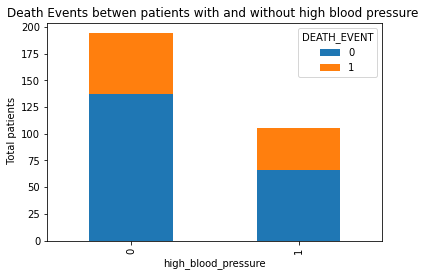

In [227]:
crosstab_high_blood_pressure = pd.crosstab(heart['high_blood_pressure'], heart['DEATH_EVENT'])
crosstab_high_blood_pressure.plot(kind='bar', stacked = True)
plt.ylabel(" Total patients")
plt.title('Death Events betwen patients with and without high blood pressure ')

Text(0.5, 1.0, ' Normalized  Death Events betwen patients with and without high blood pressure ')

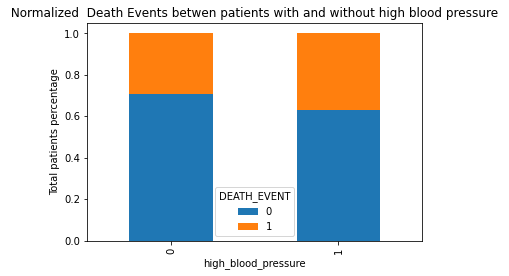

In [232]:
crosstab_norm_high_blood_pressure = crosstab_high_blood_pressure.div(crosstab_high_blood_pressure.sum(axis=1), axis = 0)
crosstab_norm_high_blood_pressure.plot(kind='bar', stacked = True)
plt.ylabel("Total patients percentage")
plt.title(' Normalized  Death Events betwen patients with and without high blood pressure ')

In [96]:
heart.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

Text(0.5, 1.0, ' Death Events betwen diffrent sex')

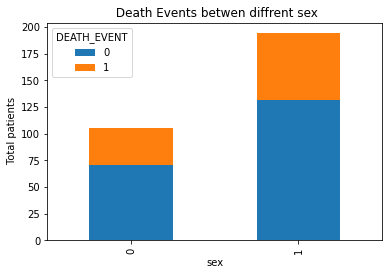

In [239]:
crosstab_sex = pd.crosstab(heart['sex'], heart['DEATH_EVENT'])
crosstab_sex.plot(kind='bar', stacked = True)
plt.ylabel(" Total patients")
plt.title(' Death Events betwen diffrent sex')

Text(0.5, 1.0, ' Normalized  Death Events betwen diffrent sex')

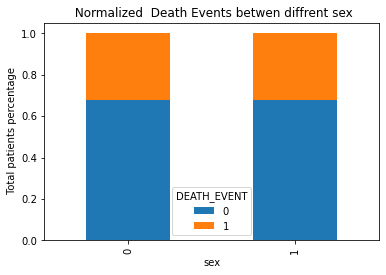

In [234]:
crosstab_norm_sex = crosstab_sex.div(crosstab_sex.sum(axis=1), axis = 0)
crosstab_norm_sex.plot(kind='bar', stacked = True)
plt.ylabel(" Total patients percentage")
plt.title(' Normalized  Death Events betwen diffrent sex')

In [99]:
heart.sex.value_counts()

1    194
0    105
Name: sex, dtype: int64

Text(0.5, 1.0, ' Death Events betwen smoking and nonsmoking')

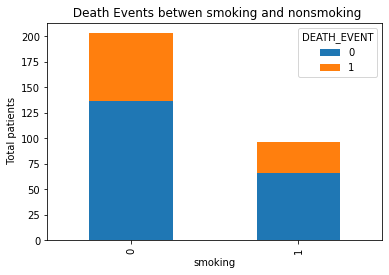

In [236]:
crosstab_smoking = pd.crosstab(heart['smoking'], heart['DEATH_EVENT'])
crosstab_smoking.plot(kind='bar', stacked = True)
plt.ylabel(" Total patients")
plt.title(' Death Events betwen smoking and nonsmoking')

Text(0.5, 1.0, ' Normalized Death Events betwen smoking and nonsmoking')

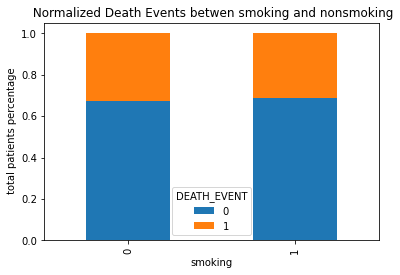

In [237]:
crosstab_norm_smoking = crosstab_smoking.div(crosstab_smoking.sum(axis=1), axis = 0)
crosstab_norm_smoking.plot(kind='bar', stacked = True)
plt.ylabel(" total patients percentage")
plt.title(' Normalized Death Events betwen smoking and nonsmoking')

In [102]:
heart.smoking.value_counts()

0    203
1     96
Name: smoking, dtype: int64

#### From the above barcharts we can tell that besides that having anaemia and high blood pressure is more likely to cause death; the rest of features does not necessarily indicate a death event.

### Check for multicollinearity.

In [103]:
X = pd.DataFrame(heart[['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
                       'serum_sodium','age','anaemia','diabetes','high_blood_pressure','sex','smoking']])

[Text(0.5, 0, 'creatinine_phosphokinase'),
 Text(1.5, 0, 'ejection_fraction'),
 Text(2.5, 0, 'platelets'),
 Text(3.5, 0, 'serum_creatinine'),
 Text(4.5, 0, 'serum_sodium'),
 Text(5.5, 0, 'age'),
 Text(6.5, 0, 'anaemia'),
 Text(7.5, 0, 'diabetes'),
 Text(8.5, 0, 'high_blood_pressure'),
 Text(9.5, 0, 'sex'),
 Text(10.5, 0, 'smoking')]

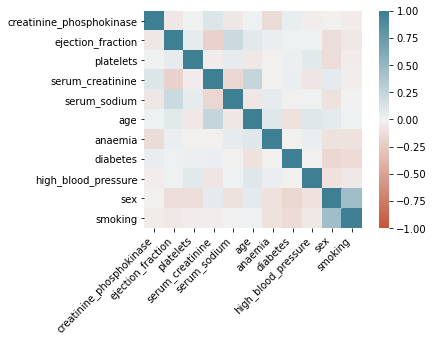

In [104]:
corr = X.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [105]:
X.corr()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking
creatinine_phosphokinase,1.000000,-0.067257,0.004120,0.111241,-0.069762,0.009850,-0.140354,0.046520,-0.026001,-0.023429,-0.039783
ejection_fraction,-0.067257,1.000000,0.054128,-0.199611,0.197044,0.084025,0.032626,0.013359,0.021615,-0.124140,-0.054775
platelets,0.004120,0.054128,1.000000,-0.038749,0.054843,-0.053858,-0.017397,0.030895,0.078735,-0.124587,-0.038568
serum_creatinine,0.111241,-0.199611,-0.038749,1.000000,-0.166704,0.249123,-0.011042,0.033689,-0.072018,0.065473,-0.028481
serum_sodium,-0.069762,0.197044,0.054843,-0.166704,1.000000,-0.065669,0.048716,-0.014613,0.011385,-0.091244,-0.001238
age,0.009850,0.084025,-0.053858,0.249123,-0.065669,1.000000,0.088006,-0.101012,0.093289,0.065430,0.018668
anaemia,-0.140354,0.032626,-0.017397,-0.011042,0.048716,0.088006,1.000000,-0.012729,0.038182,-0.094769,-0.107290
diabetes,0.046520,0.013359,0.030895,0.033689,-0.014613,-0.101012,-0.012729,1.000000,-0.012732,-0.157730,-0.147173
high_blood_pressure,-0.026001,0.021615,0.078735,-0.072018,0.011385,0.093289,0.038182,-0.012732,1.000000,-0.104615,-0.055711
sex,-0.023429,-0.124140,-0.124587,0.065473,-0.091244,0.065430,-0.094769,-0.157730,-0.104615,1.000000,0.445892


In [106]:
X.corr()[abs(X.corr())>=0.5]

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,age,anaemia,diabetes,high_blood_pressure,sex,smoking
creatinine_phosphokinase,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ejection_fraction,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platelets,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_creatinine,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_sodium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
anaemia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
diabetes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
high_blood_pressure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


No Multicollinearity.

### Partition the data and possible resampling.

75% is training set, 25% is test sets

In [107]:
heart_train, heart_test = train_test_split(heart, test_size = 0.25, random_state = 7)

In [108]:
print('Total number of records: ', heart.shape[0])

Total number of records:  299


In [109]:
print("Number of training record is {} and has proportion of {}%".format(heart_train.shape[0], 
                                                                        round(100*heart_train.shape[0]/heart.shape[0],2)))

Number of training record is 224 and has proportion of 74.92%


In [110]:
print("Number of test record is {} and has proportion of {}%".format(heart_test.shape[0], 
                                                                        round(100*heart_test.shape[0]/heart.shape[0],2)))

Number of test record is 75 and has proportion of 25.08%


Text(0.5, 1.0, ' Partition of data')

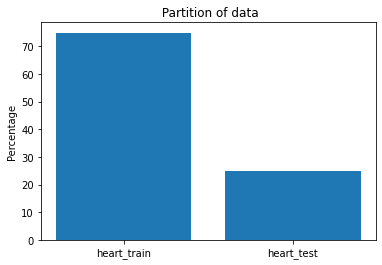

In [238]:
names = ['heart_train', 'heart_test']
percent = [round(100*heart_train.shape[0]/heart.shape[0],2), round(100*heart_test.shape[0]/heart.shape[0],2)]
plt.bar(names, percent)
plt.ylabel("Percentage")
plt.title(' Partition of data')

Check for proportion of target variable (death event counts) 

In [112]:
# Training set
heart_train['DEATH_EVENT'].value_counts(normalize=True)

0    0.651786
1    0.348214
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 34% (death events), no resampling needed.

In [113]:
heart_test['DEATH_EVENT'].value_counts(normalize=True)

0    0.76
1    0.24
Name: DEATH_EVENT, dtype: float64

This shows the proportion of target variable is 24% (death events), no resampling needed.

### Model Building

In [114]:
for col in heart_train.columns:
    print(col)

creatinine_phosphokinase
ejection_fraction
platelets
serum_creatinine
serum_sodium
age
anaemia
diabetes
high_blood_pressure
sex
smoking
time
DEATH_EVENT


#### All patients are above age of 40; and 'time' values are increments regardless of DEATH_EVENT. Thus, we remove those features and keep the rest.  

#### All models will use the same variables except for Logistc Regression

In [115]:
train_X = heart_train[['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'creatinine_phosphokinase',
                       'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']]
train_y = heart_train[['DEATH_EVENT']]

In [116]:
test_X = heart_test[['anaemia', 'high_blood_pressure', 'diabetes', 'sex', 'smoking', 'creatinine_phosphokinase',
                     'ejection_fraction', 'platelets', 'serum_creatinine','serum_sodium']]
test_y = heart_test[['DEATH_EVENT']]

#### C5.0

In [117]:
C5_train = DecisionTreeClassifier(criterion='entropy', min_samples_split=30,max_leaf_nodes=5).fit(train_X, train_y)

[Text(992.0, 951.3000000000001, 'serum_creatinine <= 0.95\nentropy = 0.932\nsamples = 224\nvalue = [146, 78]\nclass = 0'),
 Text(496.0, 679.5, 'ejection_fraction <= 27.5\nentropy = 0.561\nsamples = 61\nvalue = [53, 8]\nclass = 0'),
 Text(248.0, 407.70000000000005, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(744.0, 407.70000000000005, 'entropy = 0.376\nsamples = 55\nvalue = [51, 4]\nclass = 0'),
 Text(1488.0, 679.5, 'ejection_fraction <= 22.5\nentropy = 0.986\nsamples = 163\nvalue = [93, 70]\nclass = 0'),
 Text(1240.0, 407.70000000000005, 'entropy = 0.592\nsamples = 14\nvalue = [2, 12]\nclass = 1'),
 Text(1736.0, 407.70000000000005, 'serum_sodium <= 135.5\nentropy = 0.964\nsamples = 149\nvalue = [91, 58]\nclass = 0'),
 Text(1488.0, 135.89999999999998, 'entropy = 0.994\nsamples = 53\nvalue = [24, 29]\nclass = 1'),
 Text(1984.0, 135.89999999999998, 'entropy = 0.884\nsamples = 96\nvalue = [67, 29]\nclass = 0')]

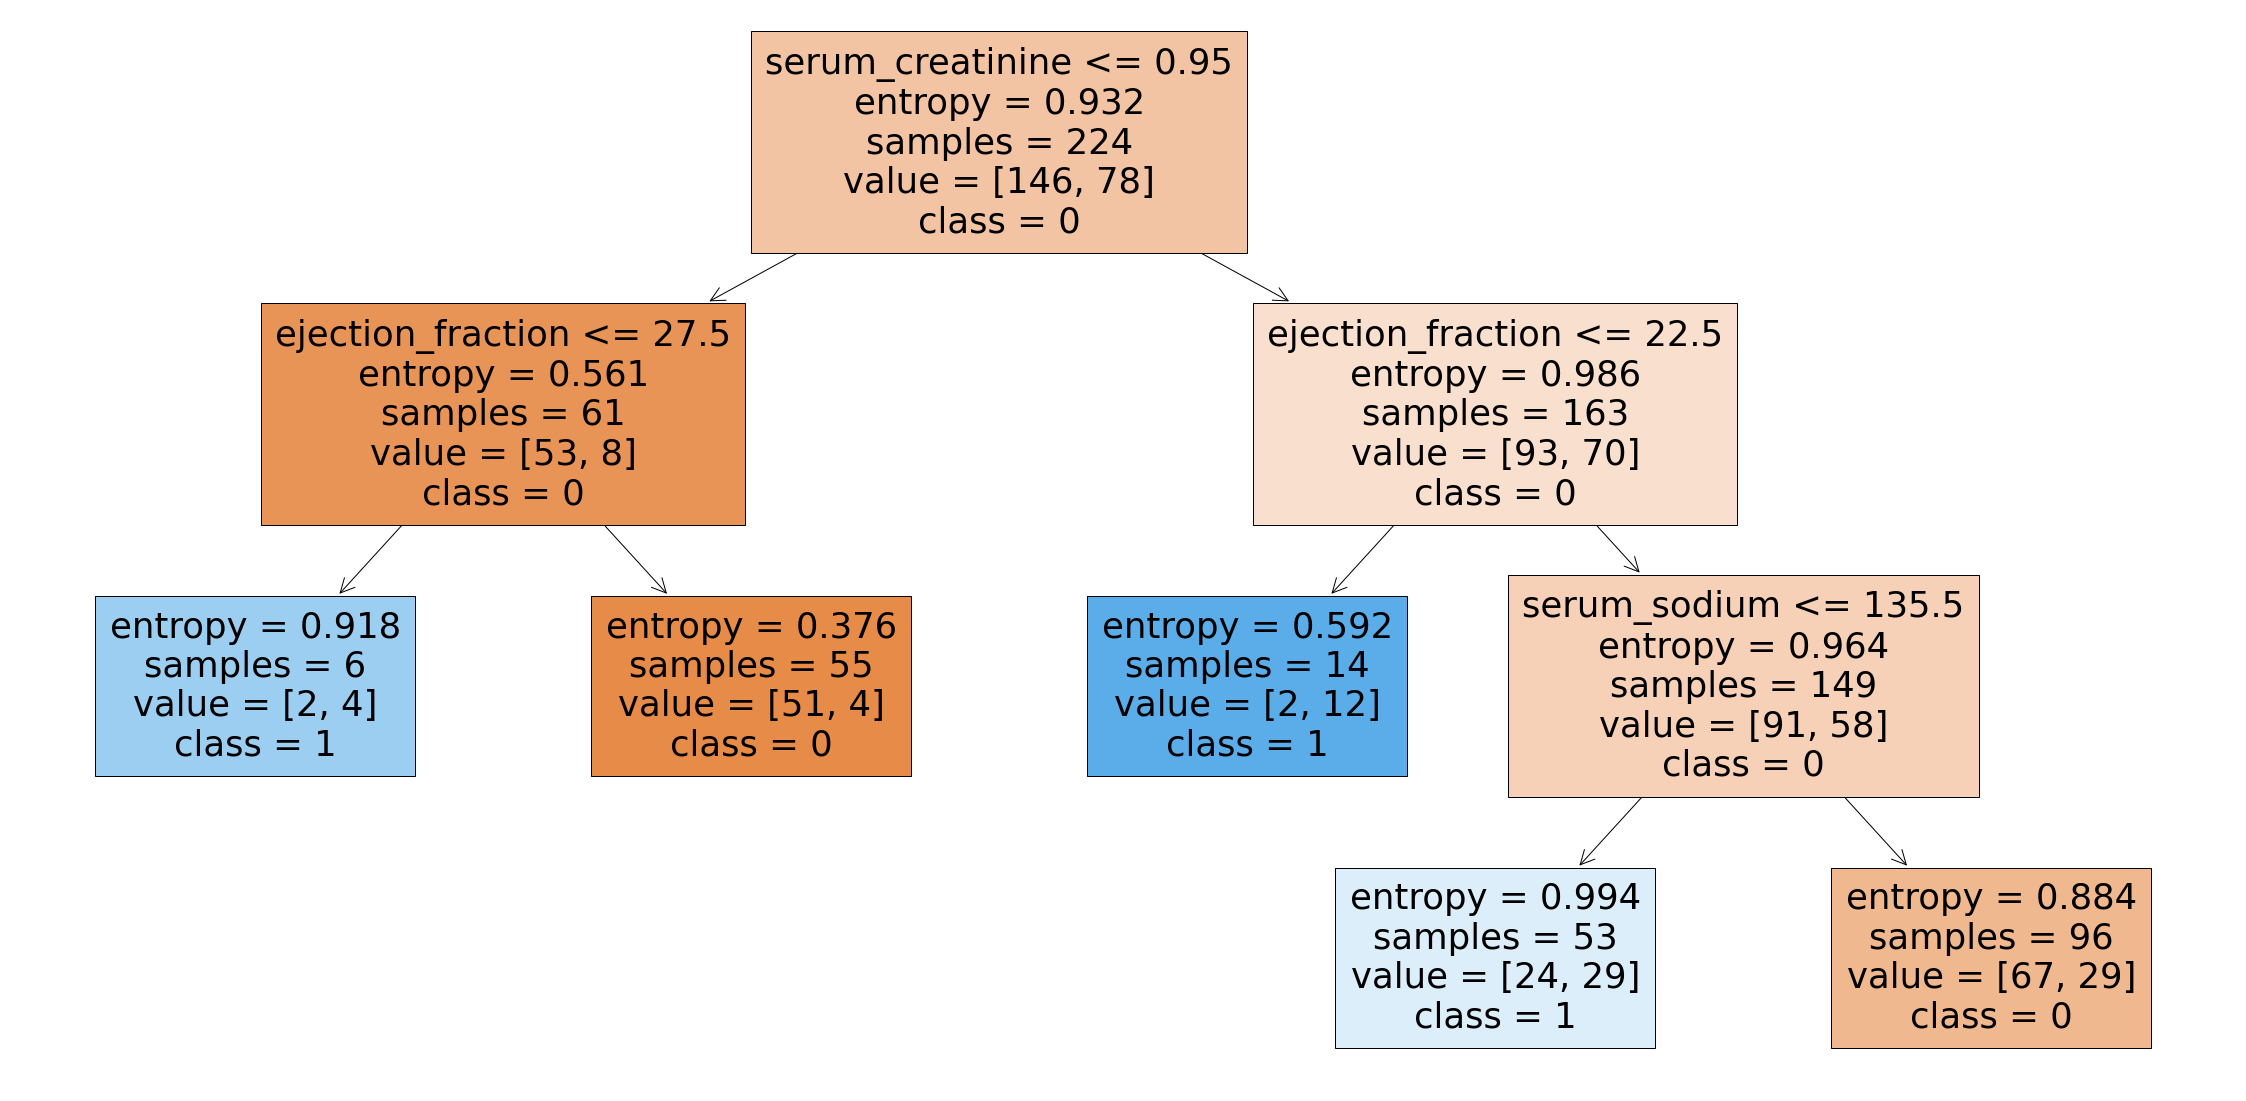

In [118]:
plt.figure(figsize=(40,20))
plot_tree(C5_train,
          feature_names = train_X.columns, 
          class_names = (train_y['DEATH_EVENT']).astype(str).unique(),
          filled=True
          )

#### C5.0 Evaluation

In [119]:
ytrue_c5 = test_y['DEATH_EVENT']
ypred_c5 = C5_train.predict(test_X)
cm_c5 = confusion_matrix(ytrue_c5,ypred_c5)
cm_c5

array([[46, 11],
       [ 9,  9]])

In [120]:
TN_c5 = cm_c5[0][0]
FP_c5 = cm_c5[0][1]
FN_c5 = cm_c5[1][0]
TP_c5 = cm_c5[1][1]
TPN_c5 = TN_c5 + FN_c5
TPP_c5 = FP_c5 + TP_c5
TAN_c5 = TN_c5 + FP_c5
TAP_c5 = FN_c5 + TP_c5
GT_c5 = TN_c5 + FN_c5 + FP_c5 + TP_c5

print('TN: ', TN_c5,
      '\nFP: ', FP_c5,
      '\nFN: ', FN_c5,
      '\nTP: ', TP_c5,
      '\nTPN: ', TPN_c5,
      '\nTPP: ', TPP_c5,
      '\nTAN: ', TAN_c5,
      '\nTAP: ', TAP_c5,
      '\nGT: ', GT_c5,
     )

TN:  46 
FP:  11 
FN:  9 
TP:  9 
TPN:  55 
TPP:  20 
TAN:  57 
TAP:  18 
GT:  75


In [121]:
print("Accuracy for C5.0 model is: ",round(((TN_c5+TP_c5)/GT_c5),4),
     '\nError Rate for C5.0 model is: ', round(1-(TN_c5+TP_c5)/GT_c5,4),
     '\nSensitivity of C5.0 model is: ', round(TP_c5/TAP_c5,4),
      '\nSpecificity of C5.0 model is: ', round(TN_c5/TAN_c5,4),
      '\nPrecision of C5.0 model is: ', round(TP_c5/TPP_c5,4),
     )

Accuracy for C5.0 model is:  0.7333 
Error Rate for C5.0 model is:  0.2667 
Sensitivity of C5.0 model is:  0.5 
Specificity of C5.0 model is:  0.807 
Precision of C5.0 model is:  0.45


#### CART

[Text(992.0, 951.3000000000001, 'serum_creatinine <= 1.05\ngini = 0.454\nsamples = 224\nvalue = [146, 78]\nclass = 0'),
 Text(496.0, 679.5, 'serum_sodium <= 129.0\ngini = 0.307\nsamples = 95\nvalue = [77, 18]\nclass = 0'),
 Text(248.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = 1'),
 Text(744.0, 407.70000000000005, 'gini = 0.285\nsamples = 93\nvalue = [77, 16]\nclass = 0'),
 Text(1488.0, 679.5, 'ejection_fraction <= 22.5\ngini = 0.498\nsamples = 129\nvalue = [69, 60]\nclass = 0'),
 Text(1240.0, 407.70000000000005, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = 1'),
 Text(1736.0, 407.70000000000005, 'serum_creatinine <= 1.815\ngini = 0.484\nsamples = 117\nvalue = [69, 48]\nclass = 0'),
 Text(1488.0, 135.89999999999998, 'gini = 0.468\nsamples = 107\nvalue = [67, 40]\nclass = 0'),
 Text(1984.0, 135.89999999999998, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = 1')]

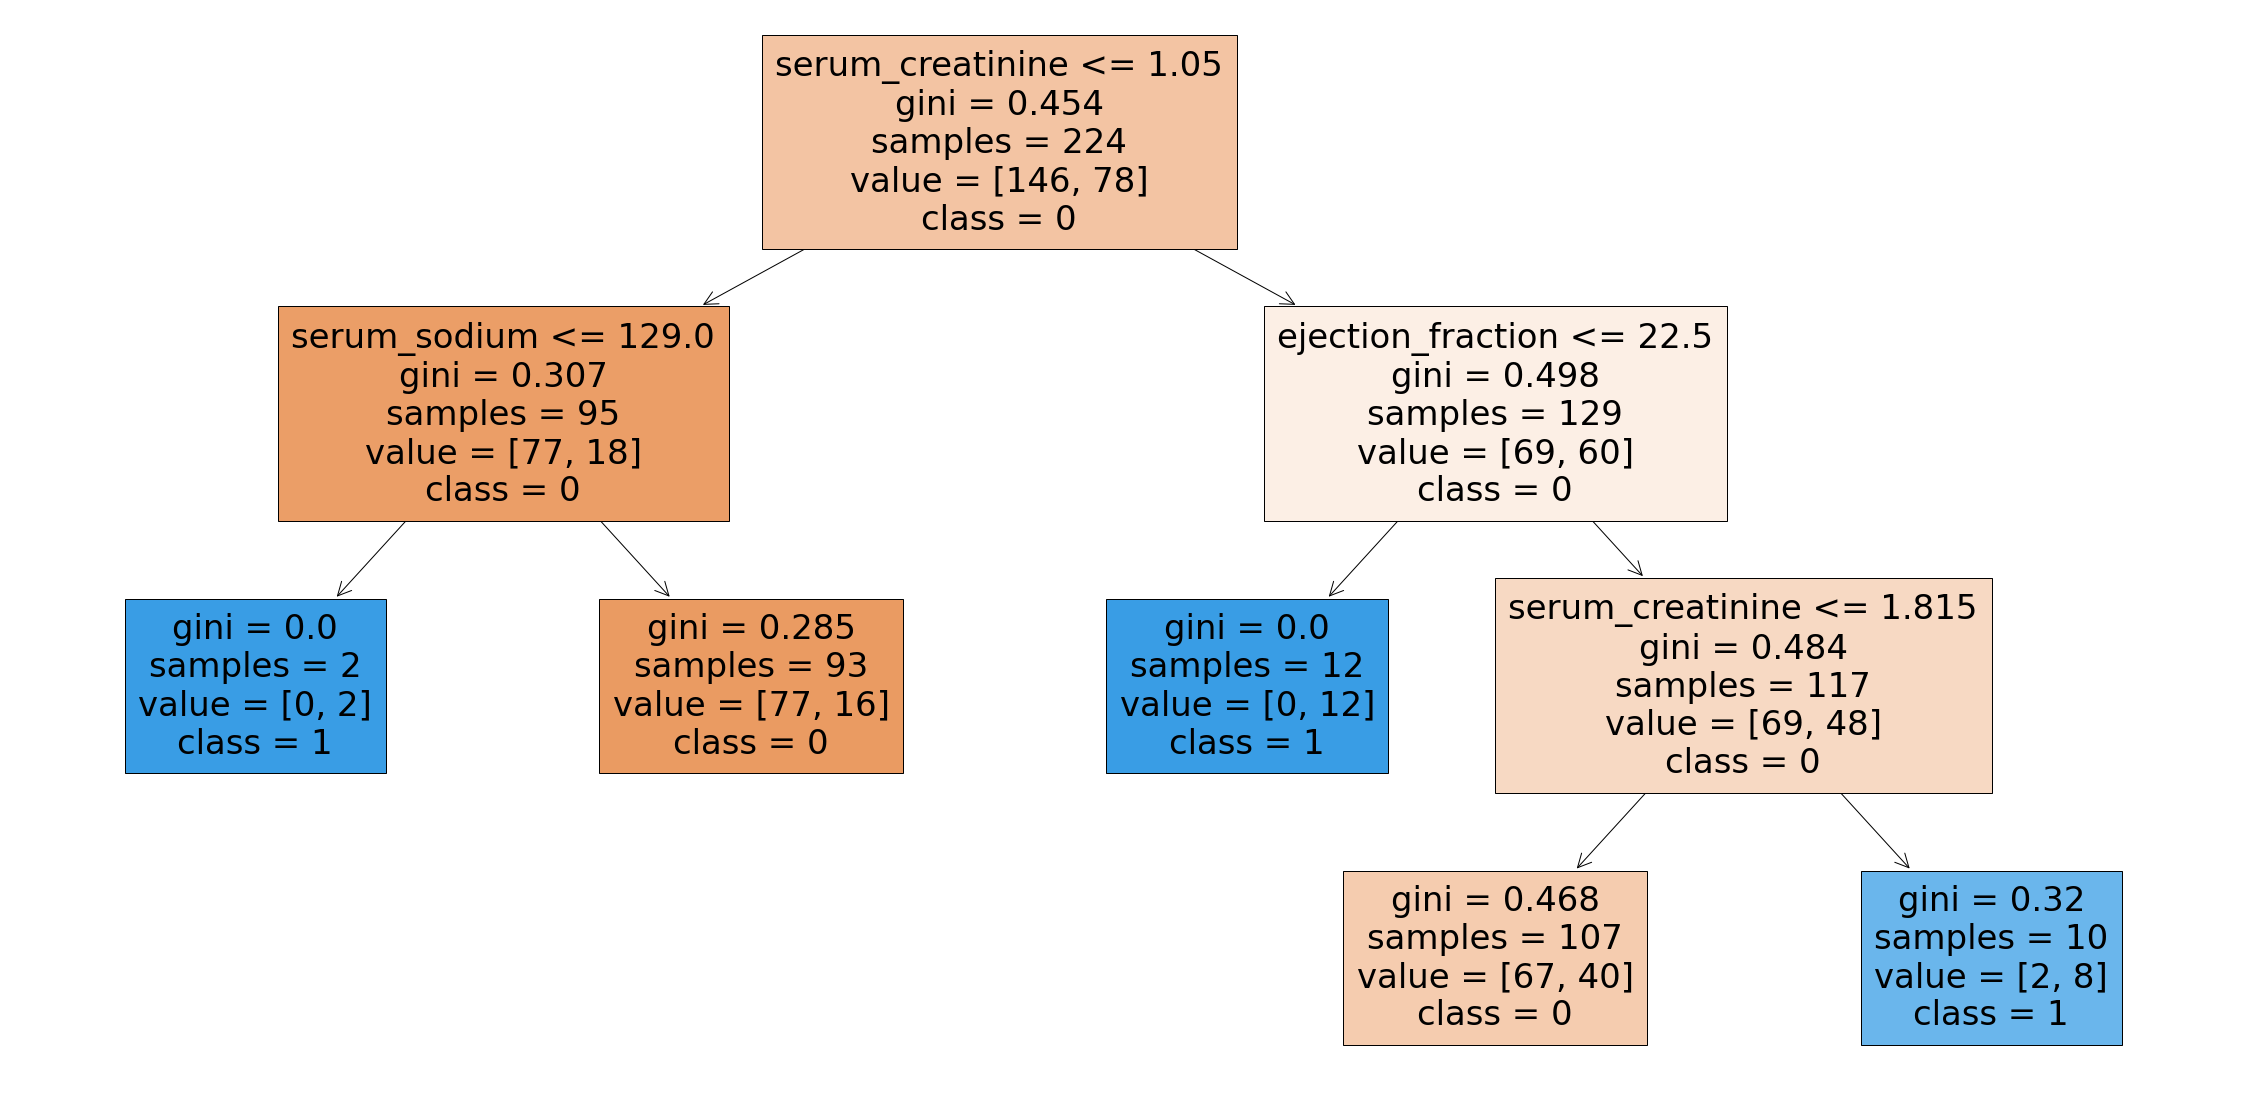

In [122]:
CART_train = DecisionTreeClassifier(criterion = "gini", min_samples_split=30, max_leaf_nodes=5).fit(train_X,train_y)
plt.figure(figsize=(40,20))
plot_tree(CART_train,
          feature_names = train_X.columns, 
          class_names = train_y['DEATH_EVENT'].astype(str).unique(),
          filled=True
          )

#### CART Evaluation

In [123]:
ytrue_cart = test_y['DEATH_EVENT']
ypred_cart = CART_train.predict(test_X)
cm_cart = confusion_matrix(ytrue_cart,ypred_cart)
cm_cart

array([[57,  0],
       [ 9,  9]])

In [124]:
TN_cart = cm_cart[0][0]
FP_cart = cm_cart[0][1]
FN_cart = cm_cart[1][0]
TP_cart = cm_cart[1][1]
TPN_cart = TN_cart + FN_cart
TPP_cart = FP_cart + TP_cart
TAN_cart = TN_cart + FP_cart
TAP_cart = FN_cart + TP_cart
GT_cart = TN_cart + FN_cart + FP_cart + TP_cart

print('TN: ', TN_cart,
      '\nFP: ', FP_cart,
      '\nFN: ', FN_cart,
      '\nTP: ', TP_cart,
      '\nTPN: ', TPN_cart,
      '\nTPP: ', TPP_cart,
      '\nTAN: ', TAN_cart,
      '\nTAP: ', TAP_cart,
       '\nGT: ', GT_cart,
     )

TN:  57 
FP:  0 
FN:  9 
TP:  9 
TPN:  66 
TPP:  9 
TAN:  57 
TAP:  18 
GT:  75


In [125]:
print("Accuracy for CART model is: ",round(((TN_cart+TP_cart)/GT_cart),4),
     '\nError Rate for CART model is: ', round(1-(TN_cart+TP_cart)/GT_cart,4),
     '\nSensitivity of CART model is: ', round(TP_cart/TAP_cart,4),
      '\nSpecificity of CART model is: ', round(TN_cart/TAN_cart,4),
      '\nPrecision of CART model is: ', round(TP_cart/TPP_cart,4),
     )

Accuracy for CART model is:  0.88 
Error Rate for CART model is:  0.12 
Sensitivity of CART model is:  0.5 
Specificity of CART model is:  1.0 
Precision of CART model is:  1.0


#### Logistic Regression

In [126]:
# Start with all variables except for time, due to the 'time' values are increments.

X = pd.DataFrame(heart_train[['anaemia', 'high_blood_pressure', 'diabetes','sex', 'age', 'smoking','creatinine_phosphokinase',
                              'ejection_fraction','platelets', 'serum_creatinine','serum_sodium']])
X = sm.add_constant(X)
y = pd.DataFrame(heart_train[['DEATH_EVENT']])

In [127]:
log_reg = sm.Logit(y, X).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.536662
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.170     
Dependent Variable:    DEATH_EVENT        AIC:                264.4246  
Date:                  2021-08-13 17:02   BIC:                305.3643  
No. Observations:      224                Log-Likelihood:     -120.21   
Df Model:              11                 LL-Null:            -144.78   
Df Residuals:          212                LLR p-value:        8.9558e-07
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
const                     9.0016   6.2090  1.4498 0.1471 -3.1678 21.1709
anaemia                   0.2313   0.3261  0.7092 0.4782 -0.4079  0.8705
high_blood_pressure       0.1959   0.3353  0.5842 0.5591 -0.4613  0.8532
diabetes                  0.0047   0.3284  0.0142 0.9887 -0.6389  0.6483
sex                      -0.5277   0.3830 -1.3779 0.1682 -1.2784  0.2229
age                       0.0505   0.0141  3.5919 0.0003  0.0229  0.0780
smoking                   0.3177   0.3779  0.8408 0.4005 -0.4229  1.0584
creatinine_phosphokinase -0.0003   0.0006 -0.5365 0.5916 -0.0015  0.0009
ejection_fraction        -0.0442   0.0149 -2.9676 0.0030 -0.0734 -0.0150
platelets                -0.0000   0.0000 -1.1604 0.2459 -0.0000  0.0000
serum_creatinine          1.2885   0.5328  2.4181 0.0156  0.2441  2.3329
serum_sodium             -0.0858   0.0440 -1.9479 0.0514 -0.1720  0.0005
========================================================================

"""

Here p-value of all the predictors excluding age, ejection_fractione and serum_creatin is more than 0.05.Therefore we will have to remodel the logistic regression and include only those variables whose p value is less than 0.05.



In [128]:
X_remodel = pd.DataFrame(heart_train[['age','ejection_fraction','serum_creatinine']])
X_remodel = sm.add_constant(X_remodel)
y_remodel = train_y

log_reg = sm.Logit(y_remodel, X_remodel).fit()
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.553316
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.144     
Dependent Variable: DEATH_EVENT      AIC:              255.8856  
Date:               2021-08-13 17:02 BIC:              269.5322  
No. Observations:   224              Log-Likelihood:   -123.94   
Df Model:           3                LL-Null:          -144.78   
Df Residuals:       220              LLR p-value:      4.7091e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -3.5947   1.0277 -3.4978 0.0005 -5.6089 -1.5804
age                0.0516   0.0134  3.8477 0.0001  0.0253  0.0778
ejection_fraction -0.0457   0.0145 -3.1552 0.0016 -0.0741 -0.0173
serum_creatinine   1.2741   0.5137  2.4803 0.0131  0.2673  2.2809
=================================================================

"""

In [129]:
X_test = pd.DataFrame(heart_test[['age','ejection_fraction','serum_creatinine']])
X_test = sm.add_constant(X_test)
y_test = pd.DataFrame(heart_test[['DEATH_EVENT']])

#### Logistic Regression Evaluation

In [130]:
ytrue_lr = y_test
ypred_lr = (log_reg.predict(X_test) > 0.5).astype(int)
cm_lr = confusion_matrix(ytrue_lr,ypred_lr)
cm_lr

array([[53,  4],
       [ 8, 10]])

In [131]:
TN_lr = cm_lr[0][0]
FP_lr = cm_lr[0][1]
FN_lr = cm_lr[1][0]
TP_lr = cm_lr[1][1]
TPN_lr = TN_lr + FN_lr
TPP_lr = FP_lr + TP_lr
TAN_lr = TN_lr + FP_lr
TAP_lr = FN_lr + TP_lr
GT_lr = TN_lr + FN_lr + FP_lr + TP_lr

print('TN: ', TN_lr,
      '\nFP: ', FP_lr,
      '\nFN: ', FN_lr,
      '\nTP: ', TP_lr,
      '\nTPN: ', TPN_lr,
      '\nTPP: ', TPP_lr,
      '\nTAN: ', TAN_lr,
      '\nTAP: ', TAP_lr,
       '\nGT: ', GT_lr,
     )

TN:  53 
FP:  4 
FN:  8 
TP:  10 
TPN:  61 
TPP:  14 
TAN:  57 
TAP:  18 
GT:  75


In [132]:
print("Accuracy for Logistic Regression model is: ",round(((TN_lr+TP_lr)/GT_lr),4),
     '\nError Rate for Logistic Regression model is: ', round(1-(TN_lr+TP_lr)/GT_lr,4),
     '\nSensitivity of Logistic Regression model is: ', round(TP_lr/TAP_lr,4),
      '\nSpecificity of Logistic Regression model is: ', round(TN_lr/TAN_lr,4),
      '\nPrecision of Logistic Regression model is: ', round(TP_lr/TPP_lr,4),
     )

Accuracy for Logistic Regression model is:  0.84 
Error Rate for Logistic Regression model is:  0.16 
Sensitivity of Logistic Regression model is:  0.5556 
Specificity of Logistic Regression model is:  0.9298 
Precision of Logistic Regression model is:  0.7143


#### Random Forest

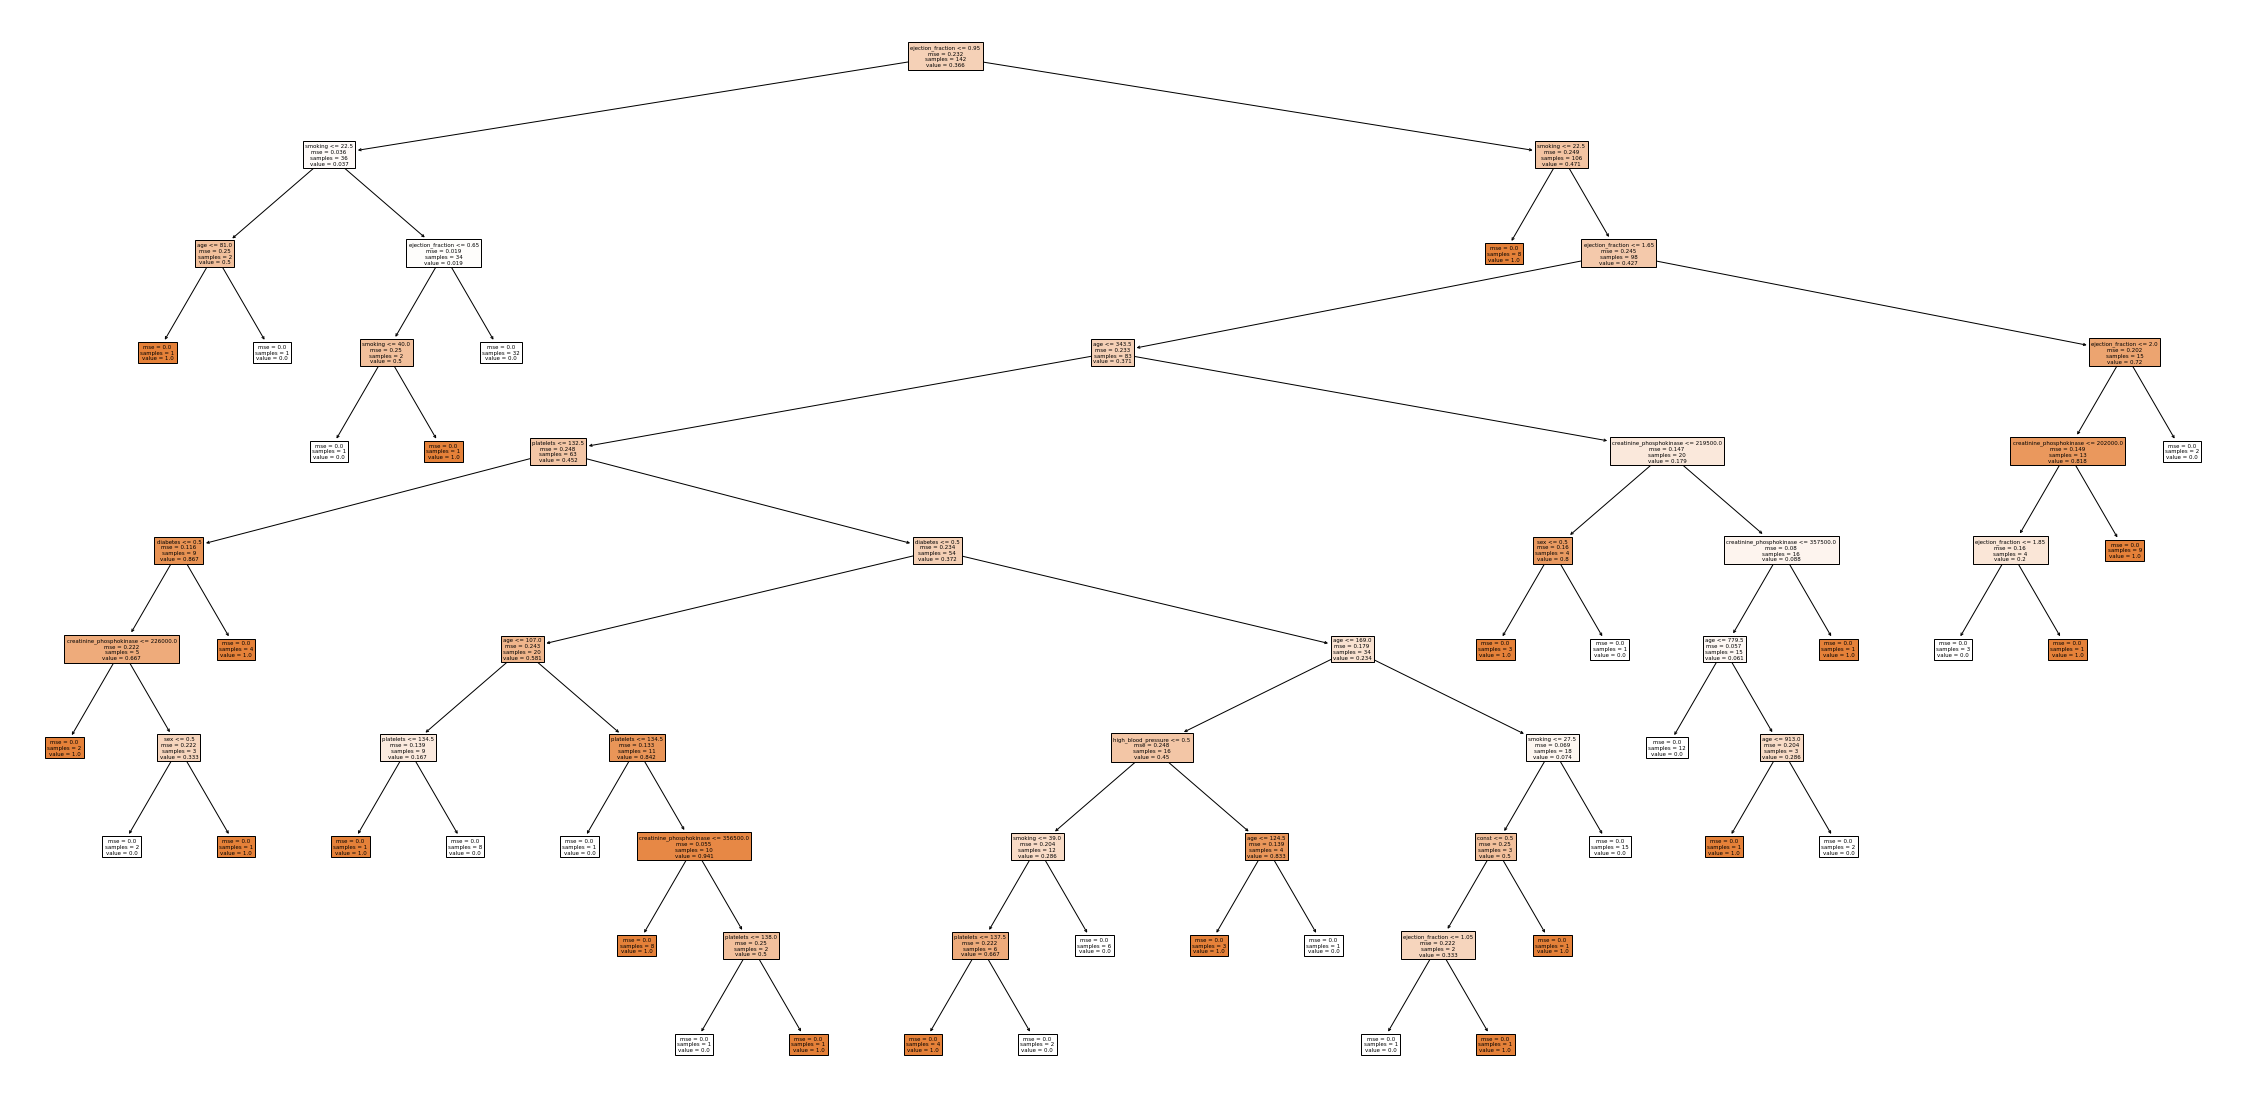

In [133]:
random.seed(7)

# Use RandomForestClassifier
rfy = np.ravel(train_y)
rand_forest = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(train_X,rfy)

# Use RandomForestRegressor
rf_train = RandomForestRegressor(n_estimators=50).fit(train_X, train_y)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',max_features='auto', 
                      max_leaf_nodes=5,
                      min_samples_leaf=30,
                      )
plt.figure(figsize=(40,20))
_ = tree.plot_tree(rf_train.estimators_[0], feature_names=X.columns, filled=True)

The tree is too large to visualize it in one figure and make it readable.

Let’s check the depth of the first tree from the Random Forest

In MLJAR’s open-source AutoML package mljar-supervised the Decision Tree’s depth is set to be in range from 1 to 4. Let’s train the Random Forest again with max_depth=3.

In [134]:
rf_train = RandomForestRegressor(n_estimators=50, max_depth=3).fit(train_X, train_y)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',max_features='auto', 
                      max_leaf_nodes=5,
                      min_samples_leaf=30,
                      )

RandomForestRegressor(max_leaf_nodes=5, min_samples_leaf=30)

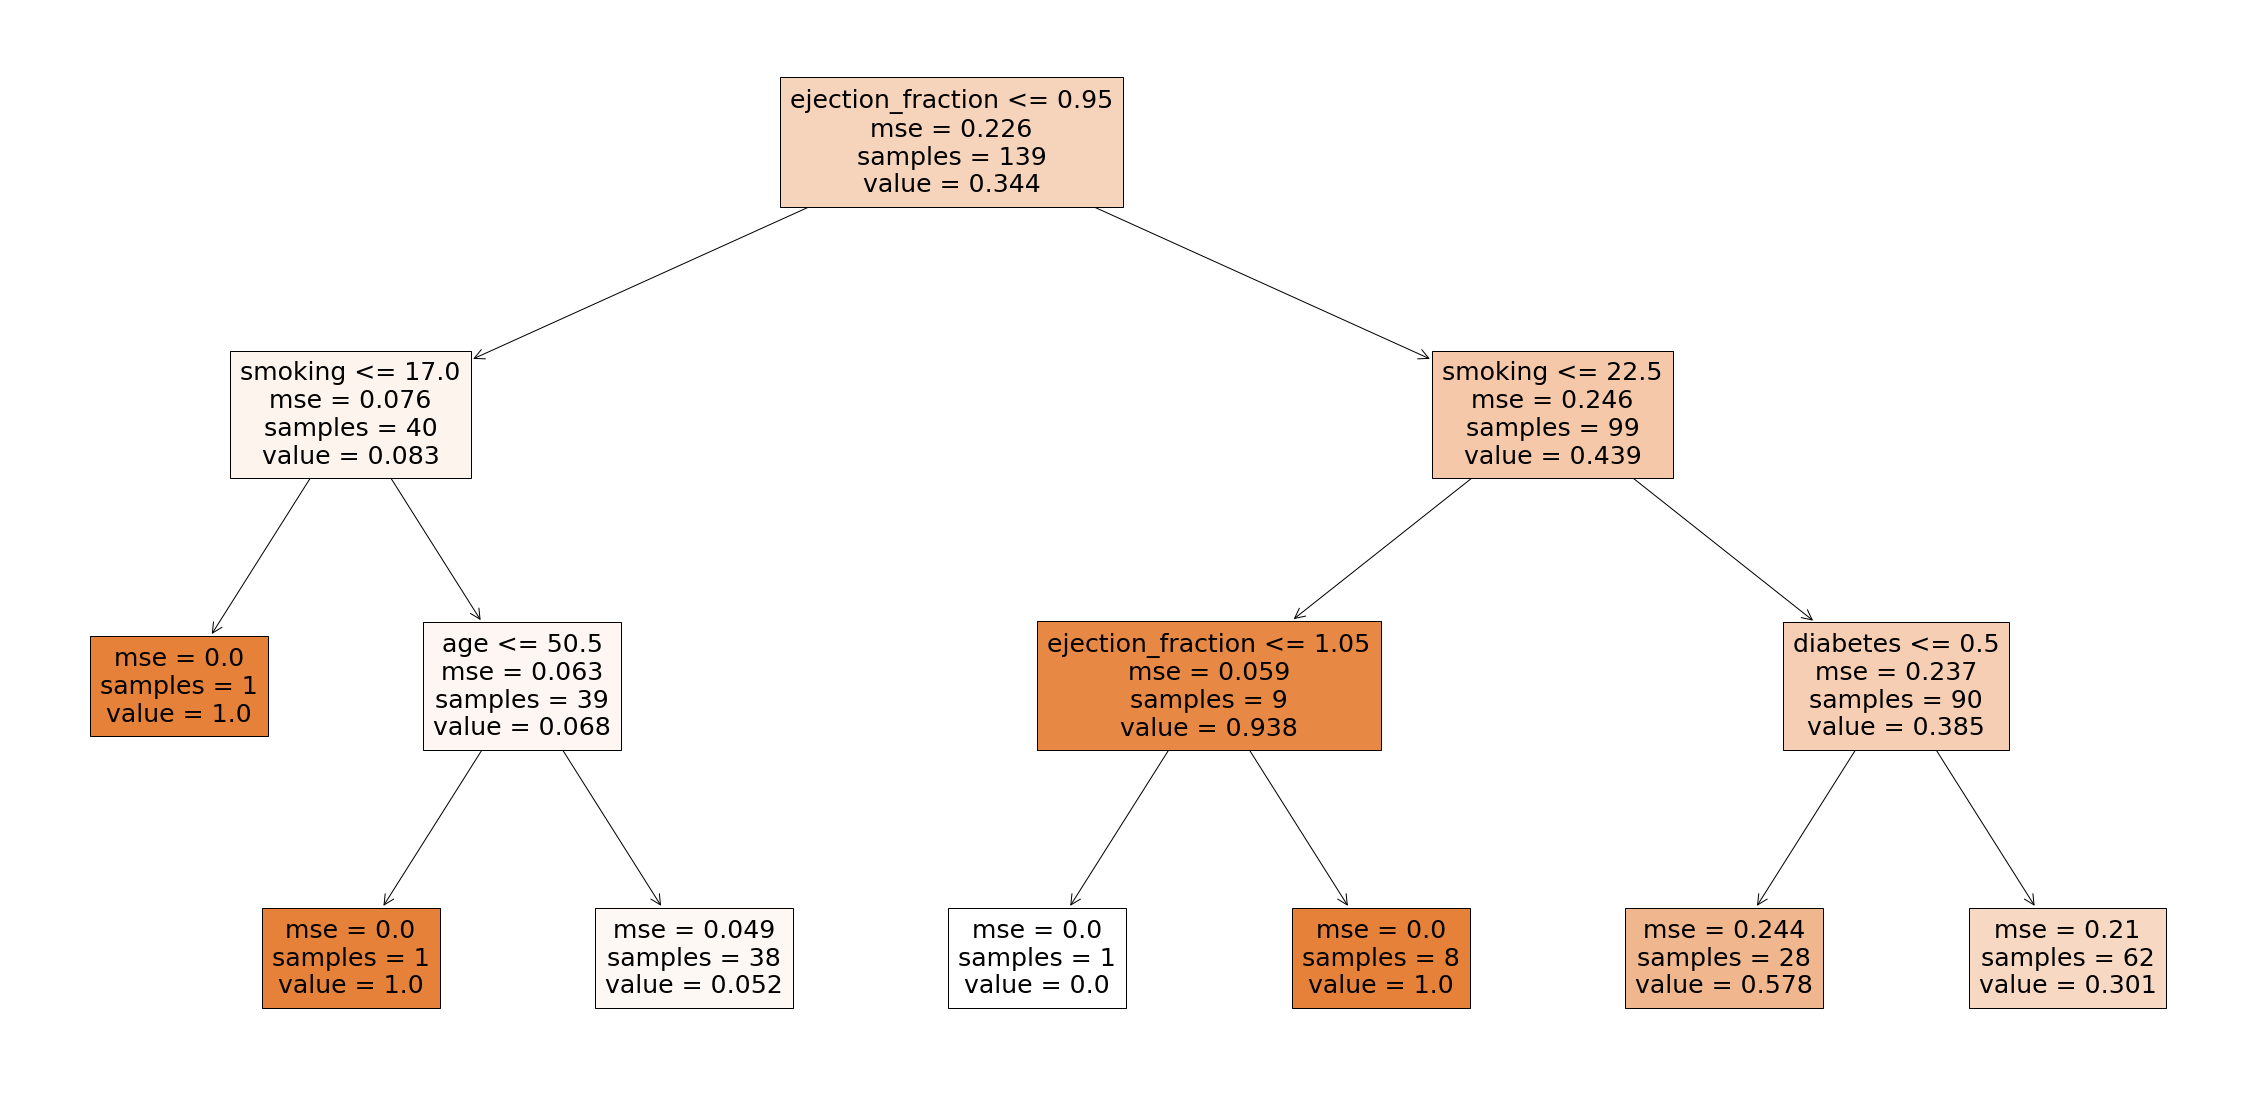

In [135]:
plt.figure(figsize=(40,20))
_ = tree.plot_tree(rf_train.estimators_[0], feature_names=X.columns,filled=True)

#### Random Forest Evaluation

In [136]:
# Use RandomForestClassifier
ytrue_rf = test_y
ypred_rf2 = (rand_forest.predict(test_X)> 0.5).astype(int)
cm_rf2 = confusion_matrix(ytrue_rf,ypred_rf2)
cm_rf2

array([[49,  8],
       [ 8, 10]])

In [137]:
# Use RandomForestRegressor
ypred_rf = (rf_train.predict(test_X)> 0.5).astype(int)
cm_rf = confusion_matrix(ytrue_rf,ypred_rf)
cm_rf

array([[54,  3],
       [ 9,  9]])

In [138]:
TN_rf = cm_rf[0][0]
FP_rf = cm_rf[0][1]
FN_rf = cm_rf[1][0]
TP_rf = cm_rf[1][1]
TPN_rf = TN_rf + FN_rf
TPP_rf = FP_rf + TP_rf
TAN_rf = TN_rf + FP_rf
TAP_rf = FN_rf + TP_rf
GT_rf = TN_rf + FN_rf + FP_rf + TP_rf

print('TN: ', TN_rf,
      '\nFP: ', FP_rf,
      '\nFN: ', FN_rf,
      '\nTP: ', TP_rf,
      '\nTPN: ', TPN_rf,
      '\nTPP: ', TPP_rf,
      '\nTAN: ', TAN_rf,
      '\nTAP: ', TAP_rf,
      '\nGT: ', GT_rf,
     )

TN:  54 
FP:  3 
FN:  9 
TP:  9 
TPN:  63 
TPP:  12 
TAN:  57 
TAP:  18 
GT:  75


In [139]:
print("Accuracy for Random Forest model is: ",round(((TN_rf+TP_rf)/GT_rf),4),
     '\nError Rate for Random Forest model is: ', round(1-(TN_rf+TP_rf)/GT_rf,4),
     '\nSensitivity of Random Forest model is: ', round(TP_rf/TAP_rf,4),
      '\nSpecificity of Random Forest model is: ', round(TN_rf/TAN_rf,4),
      '\nPrecision of Random Forest model is: ', round(TP_rf/TPP_rf,4),
     )

Accuracy for Random Forest model is:  0.84 
Error Rate for Random Forest model is:  0.16 
Sensitivity of Random Forest model is:  0.5 
Specificity of Random Forest model is:  0.9474 
Precision of Random Forest model is:  0.75


#### Naive Bayes

In [140]:
naive_bayes = MultinomialNB().fit(train_X, train_y)

#### Naive Bayes Evaluation

In [141]:
ytrue_nb = test_y
ypred_nb = naive_bayes.predict(test_X)
cm_nb = confusion_matrix(ytrue_nb,ypred_nb)
cm_nb

array([[35, 22],
       [11,  7]])

In [142]:
TN_nb = cm_nb[0][0]
FP_nb = cm_nb[0][1]
FN_nb = cm_nb[1][0]
TP_nb = cm_nb[1][1]
TPN_nb = TN_nb + FN_nb
TPP_nb = FP_nb + TP_nb
TAN_nb = TN_nb + FP_nb
TAP_nb = FN_nb + TP_nb
GT_nb = TN_nb + FN_nb + FP_nb + TP_nb

print('TN: ', TN_nb,
      '\nFP: ', FP_nb,
      '\nFN: ', FN_nb,
      '\nTP: ', TP_nb,
      '\nTPN: ', TPN_nb,
      '\nTPP: ', TPP_nb,
      '\nTAN: ', TAN_nb,
      '\nTAP: ', TAP_nb,
      '\nGT: ', GT_nb,
     )

TN:  35 
FP:  22 
FN:  11 
TP:  7 
TPN:  46 
TPP:  29 
TAN:  57 
TAP:  18 
GT:  75


In [143]:
print("Accuracy for Naive Bayes model is: ",round(((TN_nb+TP_nb)/GT_nb),4),
     '\nError Rate for Naive Bayes model is: ', round(1-(TN_nb+TP_nb)/GT_lr,4),
     '\nSensitivity of Naive Bayes model is: ', round(TP_nb/TAP_nb,4),
      '\nSpecificity of Naive Bayes model is: ', round(TN_nb/TAN_nb,4),
      '\nPrecision of Naive Bayes model is: ', round(TP_nb/TPP_nb,4),
     )

Accuracy for Naive Bayes model is:  0.56 
Error Rate for Naive Bayes model is:  0.44 
Sensitivity of Naive Bayes model is:  0.3889 
Specificity of Naive Bayes model is:  0.614 
Precision of Naive Bayes model is:  0.2414


### ROC-AUC Curves

<Figure size 432x288 with 0 Axes>

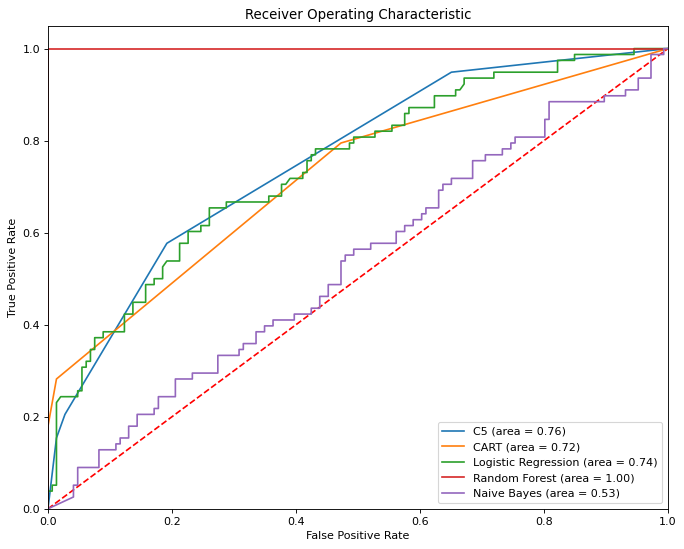

In [144]:
# Plot ROC Curve using training set

#C5
probs_c5 = C5_train.predict_proba(train_X)
preds_c5 = probs_c5[:,1]

#CART
probs_cart = CART_train.predict_proba(train_X)
preds_cart = probs_cart[:,1]

#NB
probs_nb = naive_bayes.predict_proba(train_X)
preds_nb = probs_nb[:,1]

#RF
probs_rf = rand_forest.predict_proba(train_X)
preds_rf = probs_rf[:,1]

fpr1, tpr1, threshold1 = metrics.roc_curve(train_y, preds_c5)
fpr2, tpr2, threshold2 = metrics.roc_curve(train_y, preds_cart)
fpr3, tpr3, threshold3 = roc_curve(y_remodel, log_reg.predict(X_remodel))
fpr4, tpr4, threshold4 = metrics.roc_curve(train_y, preds_rf)
fpr5, tpr5, threshold5 = metrics.roc_curve(train_y, preds_nb)


c5_roc_auc = metrics.auc(fpr1, tpr1)
cart_roc_auc = metrics.auc(fpr2, tpr2)
logit_roc_auc = roc_auc_score(y_remodel, log_reg.predict(X_remodel))
rf_roc_auc = metrics.auc(fpr4, tpr4)
nb_roc_auc = metrics.auc(fpr5, tpr5)





plt.figure()
figure(figsize=(10, 8), dpi=80)
plt.plot([0, 1], [0, 1],'r--')

plt.plot(fpr1, tpr1, label = 'C5 (area = %0.2f)' % c5_roc_auc)
plt.plot(fpr2, tpr2, label = 'CART (area = %0.2f)' % cart_roc_auc)
plt.plot(fpr3, tpr3, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr4, tpr4, label = 'Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(fpr5, tpr5, label = 'Naive Bayes (area = %0.2f)' % nb_roc_auc)



plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The "steppy" shape of the ROC curve is due to the nature of smaller sample size and limited continuous feature amount.

The ROC-AUC curve also validates that decision tree algorithms are able to deal with outliers while Naive Bayers is heavily affected by outliers.

### Model Evaluation Table

In [145]:
evaluation_measures_table = {'Evaluation Measure': ['Accuracy','Error Rate', 'Sensitivity', 'Specificity', 'Precision'], 
         'C5.0': [round(((TN_c5+TP_c5)/GT_c5),4), round(1-(TN_c5+TP_c5)/GT_c5,4), round(TP_c5/TAP_c5,4), round(TN_c5/TAN_c5,4), round(TP_c5/TPP_c5,4)],
         'CART': [round(((TN_cart+TP_cart)/GT_cart),4), round(1-(TN_cart+TP_cart)/GT_cart,4), round(TP_cart/TAP_cart,4), round(TN_cart/TAN_cart,4),round(TP_cart/TPP_cart,4)], 
         'Logistic Regression': [round(((TN_lr+TP_lr)/GT_lr),4), round(1-(TN_lr+TP_lr)/GT_lr,4), round(TP_lr/TAP_lr,4), round(TN_lr/TAN_lr,4), round(TP_lr/TPP_lr,4)],
        'Random Forest': [round(((TN_rf+TP_rf)/GT_rf),4), round(1-(TN_rf+TP_rf)/GT_rf,4), round(TP_rf/TAP_rf,4), round(TN_rf/TAN_rf,4), round(TP_rf/TPP_rf,4)],
        'Naive Bayes': [round(((TN_nb+TP_nb)/GT_nb),4), round(1-(TN_nb+TP_nb)/GT_nb,4), round(TP_nb/TAP_nb,4), round(TN_nb/TAN_nb,4), round(TP_nb/TPP_nb,4)]
                            }



table_data = pd.DataFrame(evaluation_measures_table, 
                          columns= ['Evaluation Measure','C5.0','CART','Logistic Regression',
                                                              'Random Forest','Naive Bayes'])
table_data

,Evaluation Measure,C5.0,CART,Logistic Regression,Random Forest,Naive Bayes
0,Accuracy,0.7333,0.88,0.8400,0.8400,0.5600
1,Error Rate,0.2667,0.12,0.1600,0.1600,0.4400
2,Sensitivity,0.5000,0.50,0.5556,0.5000,0.3889
3,Specificity,0.8070,1.00,0.9298,0.9474,0.6140
4,Precision,0.4500,1.00,0.7143,0.7500,0.2414
